# TensorFlow

TensorFlow is an open source software library for numerical computation using data flow graphs. In a data flow graph, nodes represent mathematical operations and edges represent the multidimensional data arrays (tensors) communicated between them.

![](https://raw.githubusercontent.com/wdbm/abstraction/master/media/2016-05-14T1754Z.png)

https://unsupervisedmethods.com/cheat-sheet-of-machine-learning-and-python-and-math-cheat-sheets-a4afe4e791b6

In [1]:
import tensorflow as tf

In [2]:
tf.TF_CPP_MIN_LOG_LEVEL = 3

In [3]:
# Create a constant operation. This operation is added as a node to the default graph.
hello = tf.constant("hello world")

# Start a TensorFlow session.
sess = tf.Session()

# Run the operation and get the result.
print(sess.run(hello))

hello world


# tensors, ranks, shapes and types

|**rank**|**mathamatical object**|**shape**  |**example**                       |
|--------|-----------------------|-----------|----------------------------------|
|0       |scalar                 |`[]`       |`3`                               |
|1       |vector                 |`[3]`      |`[1. ,2., 3.]`                    |
|2       |matrix                 |`[2, 3]`   |`[[1., 2., 3.], [4., 5., 6.]]`    |
|3       |3-tensor               |`[2, 1, 3]`|`[[[1., 2., 3.]], [[7., 8., 9.]]]`|
|n       |n-tensor               |...        |...                               |

|**data type**|Python type|**description**       |
|-------------|-----------|----------------------|
|`DT_FLOAT`   |`t.float32`|32 bits floating point|
|`DT_DOUBLE`  |`t.float64`|64 bits floating point|
|`DT_INT8`    |`t.int8`   |8 bits signed integer |
|`DT_INT16`   |`t.int16`  |16 bits signed integer|
|`DT_INT32`   |`t.int32`  |32 bits signed integer|
|`DT_INT64`   |`t.int64`  |64 bits signed integer|

# TensorFlow mechanics

- 1 Build a graph using TensorFlow operations.
- 2 Feed data to TensorFlow and run the graph.
- 3 Update variables in the graph and return values.

In [4]:
node1 = tf.constant(3.0, tf.float32)
node2 = tf.constant(4.0) # (also tf.float32 by default)
node3 = tf.add(node1, node2)

print("node1: {node}".format(node = node1))
print("node2: {node}".format(node = node2))
print("node3: {node}".format(node = node3))

node1: Tensor("Const_1:0", shape=(), dtype=float32)
node2: Tensor("Const_2:0", shape=(), dtype=float32)
node3: Tensor("Add:0", shape=(), dtype=float32)


In [5]:
sess = tf.Session()

print("sess.run(node1, node2): {result}".format(
    result = sess.run([node1, node2])
))
print("sess.run(node3):        {result}".format(
    result = sess.run(node3)
))

sess.run(node1, node2): [3.0, 4.0]
sess.run(node3):        7.0


In [6]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

# Create a node that is a shortcut for tf.add(a, b).
adder_node = a + b

result = sess.run(
    adder_node,
    feed_dict = {
        a: 3,
        b: 4.5
    }
)
print(result)

7.5


In [7]:
result = sess.run(
    adder_node,
    feed_dict = {
        a: [1,3],
        b: [2, 4]
    }
)

print(result)

[ 3.  7.]


In [8]:
add_and_triple = adder_node * 3.

result = sess.run(
    add_and_triple,
    feed_dict = {
        a: 3,
        b: 4.5
    }
)

print(result)

22.5


# session

A `Session` is a class for running TensorFlow operations. A session object encapsulates the environment in which operations are executed and tensors are evaluated. For example, `sess.run(c)` evaluates the tensor `c`.

A session is run using its `run` method:

```Python
tf.Session.run(
    fetches,
    feed_dict    = None,
    options      = None,
    run_metadata = None
)
```

This method runs operations and evaluates tensors in fetches. It returns one epoch of TensorFlow computation, by running the necessary graph fragment to execute every operation and evaluate every tensor in fetches, substituting the values in `feed_dict` for the corresponding input values. The `fetches` option can be a single graph element, or an arbitrary nested list, tuple, namedtuple, dict or OrderedDict containing graph elements at its leaves. The value returned by `run` has the same shape as the fetches argument, where the leaves are replaced by the corresponding values returned by TensorFlow.

In [18]:
sess = tf.Session()

a = tf.constant([10 ,  20])
b = tf.constant([1.0, 2.0])

print(sess.run(a))
print(sess.run([a, b]))

[10 20]
[array([10, 20], dtype=int32), array([ 1.,  2.], dtype=float32)]


# variables

In [10]:
# Create two variables.
weights = tf.Variable(
    tf.random_normal(
        [784, 200],
        stddev = 0.35
    ),
    name = "weights"
)
biases = tf.Variable(
    tf.zeros([200]),
    name = "biases"
)

# Create an operation to initialize the variables.
init_op = tf.global_variables_initializer()

# more code

with tf.Session() as sess:
    sess.run(init_op)

# single variable linear regression

- hypothesis: ${H\left(x\right)=Wx+b}$

- cost function: ${\textrm{cost}\left(W,b\right)=\frac{1}{m}\Sigma_{i=1}^{m}\left(H\left(x^{i}\right)-y^{i}\right)^{2}}$

In [11]:
import tensorflow as tf
tf.set_random_seed(777)

# Create some data.
x_train = [1, 2, 3]
y_train = [1, 2, 3]

# Build the graph using TensorFlow operations. With the hypothesis H(x) = Wx + b, the goal is to try to find values for W and b to in order to calculate y_data = x_data * W + b. Analytically, W should be 1 and b should be 0.
W = tf.Variable(tf.random_normal([1]), name = "weight")
b = tf.Variable(tf.random_normal([1]), name = "bias")

# Define the hypothesis.
hypothesis = x_train * W + b

# Define the cost function.
cost = tf.reduce_mean(tf.square(hypothesis - y_train))

# Define a method of minimisation, in this case gradient descent. In gradient descent, steps proportional to the negative of the function gradient at the current point are taken. It is the method of steepest descent to find the local minimum of a function.
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()

# Initialize global variables in the graph.
sess.run(tf.global_variables_initializer())

# Fit.
for step in range(2001):
    sess.run(train)
    if step % 500 == 0:
        print("step: {step}, cost: {cost}, W: {W}, b: {b}".format(
            step = step,
            cost = sess.run(cost),
            W    = sess.run(W),
            b    = sess.run(b)
        ))

step: 0, cost: 0.327590852976, W: [ 1.69378853], b: [-1.30574894]
step: 500, cost: 0.0235481653363, W: [ 1.17822742], b: [-0.40515277]
step: 1000, cost: 0.00212170509622, W: [ 1.05349815], b: [-0.12161381]
step: 1500, cost: 0.000191168233869, W: [ 1.01605844], b: [-0.0365047]
step: 2000, cost: 1.72240033862e-05, W: [ 1.00482023], b: [-0.01095748]


# placeholders and variables

A variable (`tf.Variable`) is used generally for trainable variables such as weights and biases for a model. A placeholder (`tf.placeholder`) is used to feed actual training examples. A variable is set with an initial value on declaration while a placeholder doesn't require an initial value on declaration, but has its value specified at run time using the session `feed_dict`. In TensorFlow, variables are trained over time while placeholders are input data that doesn't change as the model trains (e.g. input images and class labels for the images).

A placeholder is a value that is input when TensorFlow is set to run a computation. A variable is a modifiable tensor that exists in TensorFlow's graph of interacting operations.

In [12]:
import tensorflow as tf

W = tf.Variable(tf.random_normal([1]), name = "weight")
b = tf.Variable(tf.random_normal([1]), name = "bias")

# Create placeholders for tensors for x and y data.
X = tf.placeholder(tf.float32, shape = [None])
Y = tf.placeholder(tf.float32, shape = [None])

hypothesis = x_train * W + b
cost = tf.reduce_mean(tf.square(hypothesis - y_train))

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

# Fit.
for step in range(2001):
    cost_value, W_value, b_value, _ = sess.run(
        [cost, W, b, train],
        feed_dict = {
            X: [1, 2, 3],
            Y: [1, 2, 3]
        }
    )
    if step % 500 == 0:
        print("step: {step}, cost: {cost}, W: {W}, b: {b}".format(
            step = step,
            cost = cost_value,
            W    = W_value,
            b    = b_value
        ))

# Test the trained model.
print(sess.run(hypothesis, feed_dict={X: [5]}))
print(sess.run(hypothesis, feed_dict={X: [2.5]}))
print(sess.run(hypothesis, feed_dict={X: [1.5, 3.5]}))

step: 0, cost: 19.0289134979, W: [-0.81955934], b: [ 0.05452838]
step: 500, cost: 0.0066645629704, W: [ 0.90541184], b: [ 0.21502104]
step: 1000, cost: 0.000600479834247, W: [ 0.97160774], b: [ 0.06454235]
step: 1500, cost: 5.41025183338e-05, W: [ 0.99147761], b: [ 0.01937346]
step: 2000, cost: 4.87493980472e-06, W: [ 0.99744177], b: [ 0.00581537]
[ 1.00325716  2.0006988   2.99814057]
[ 1.00325716  2.0006988   2.99814057]
[ 1.00325716  2.0006988   2.99814057]


# cost minimization

- simplified hypothesis: ${H\left(x\right)=Wx}$

- cost function: ${\textrm{cost}\left(W\right)=\frac{1}{m}\Sigma_{i=1}^{m}\left(H\left(x^{i}\right)-y^{i}\right)^{2}}$

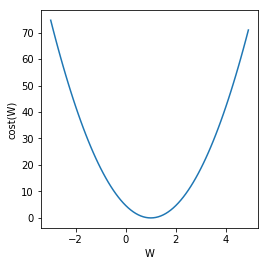

In [13]:
import tensorflow as tf
import matplotlib.pyplot as plt

X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.placeholder(tf.float32)

hypothesis = X * W
cost = tf.reduce_mean(tf.square(hypothesis - Y))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

# Variables for plotting cost function
W_value    = []
cost_value = []

for i in range(-30, 50):

    feed_W = i * 0.1
    cost_current, W_current = sess.run(
        [cost, W],
        feed_dict = {W: feed_W}
    )

    W_value.append(W_current)
    cost_value.append(cost_current)

plt.xlabel("W"); plt.ylabel("cost(W)")
plt.plot(W_value, cost_value)
plt.axes().set_aspect(1 / plt.axes().get_data_ratio())
plt.show()

# multivariable linear regression

- hypothesis defined without using a matrix: ${H\left(x_{1},x_{2},x_{3}\right)=x_{1}w_{1}+x_{2}w_{2}+x_{3}w_{3}}$

test scores for general psychology:

|**${x_{1}}$**|**${x_{2}}$**|**${x_{3}}$**|**${Y}$**|
|-------------|-------------|-------------|---------|
|73           |80           |75           |152      |
|93           |88           |93           |185      |
|89           |91           |90           |180      |
|96           |98           |100          |196      |
|73           |66           |70           |142      |

In [18]:
import tensorflow as tf

x1_data = [ 73.,  93.,  89.,  96.,  73.]
x2_data = [ 80.,  88.,  91.,  98.,  66.]
x3_data = [ 75.,  93.,  90., 100.,  70.]

y_data  = [152., 185., 180., 196., 142.]

x1 = tf.placeholder(tf.float32)
x2 = tf.placeholder(tf.float32)
x3 = tf.placeholder(tf.float32)
Y  = tf.placeholder(tf.float32)

w1 = tf.Variable(tf.random_normal([1]), name = "weight1")
w2 = tf.Variable(tf.random_normal([1]), name = "weight2")
w3 = tf.Variable(tf.random_normal([1]), name = "weight3")
b  = tf.Variable(tf.random_normal([1]), name = "bias"   )

hypothesis = x1 * w1 + x2 * w2 + x3 * w3 + b
cost       = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-5)
train     = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_value, hy_value, _ = sess.run(
        [cost, hypothesis, train],
        feed_dict = {
            x1: x1_data,
            x2: x2_data,
            x3: x3_data,
            Y:  y_data
        }
    )

    if step % 500 == 0:
        print("\nstep: {step}, cost: {cost},\nprediction: {prediction}".format(
            step       = step,
            cost       = cost_value,
            prediction = hy_value
        ))


step: 0, cost: 1221.08886719,
prediction: [ 123.09977722  145.56219482  144.64117432  158.4463501   109.52912903]

step: 500, cost: 5.31126022339,
prediction: [ 153.60321045  183.01623535  181.1355896   198.21069336  138.27522278]

step: 1000, cost: 4.28688764572,
prediction: [ 153.2394104   183.26794434  181.02700806  198.10955811  138.62460327]

step: 1500, cost: 3.50106287003,
prediction: [ 152.92288208  183.48718262  180.93289185  198.01914978  138.9311676 ]

step: 2000, cost: 2.89726567268,
prediction: [ 152.6476593   183.67808533  180.85136414  197.93815613  139.20033264]


- hypothesis defined using a matrix:

$${
\begin{pmatrix}
x_{1} & x_{2} & x_{3}\\
\end{pmatrix}
\cdot
\begin{pmatrix}
w_{1} \\
w_{2} \\
w_{3} \\
\end{pmatrix}
=
\left(x_{1}w_{1}+x_{2}w_{2}+x_{3}w_{3}\right)
}$$

$${
H\left(X\right)=XW
}$$

In [23]:
import tensorflow as tf

x_data = [
             [ 73.,  80.,  75.],
             [ 93.,  88.,  93.],
             [ 89.,  91.,  90.],
             [ 96.,  98., 100.],
             [ 73.,  66.,  70.]
         ]
y_data = [
             [152.],
             [185.],
             [180.],
             [196.],
             [142.]
         ]

X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name = "weight")
b = tf.Variable(tf.random_normal([1]),    name = "bias"  )

hypothesis = tf.matmul(X, W) + b
cost       = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-5)
train     = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_value, hy_value, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    if step % 500 == 0:
        print("\nstep: {step}, cost: {cost},\nprediction:\n{prediction}".format(
            step       = step,
            cost       = cost_value,
            prediction = hy_value
        ))


step: 0, cost: 65613.796875,
prediction:
[[-70.3801651 ]
 [-92.29891968]
 [-86.97892761]
 [-94.72986603]
 [-72.28895569]]

step: 500, cost: 13.3241577148,
prediction:
[[ 156.13461304]
 [ 181.35145569]
 [ 181.92817688]
 [ 198.17074585]
 [ 136.72895813]]

step: 1000, cost: 10.2774734497,
prediction:
[[ 155.48991394]
 [ 181.79486084]
 [ 181.73246765]
 [ 198.01477051]
 [ 137.32301331]]

step: 1500, cost: 7.95214223862,
prediction:
[[ 154.92767334]
 [ 182.18174744]
 [ 181.56201172]
 [ 197.8772583 ]
 [ 137.84272766]]

step: 2000, cost: 6.17698717117,
prediction:
[[ 154.43740845]
 [ 182.51925659]
 [ 181.41358948]
 [ 197.75588989]
 [ 138.29750061]]


# qualifying accuracy, ROC curves

A receiver operating characteristic curve is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The true-positive rate is plotted against the false-positive rate at various threshold settings. The true-positive rate is also known as sensitivity or probability of detection. The false-positive rate is also known as the fall-out or probability of false alarm and can be calculated as (1- specificity), where specificity is the true-negative rate.

- sensitivity/true-positive rate: proportion of positives that are correctly identified as such
- specificity/true-negative rate: proportion of negatives that are correctly identified as such
- false-positive rate: proportion of positives that are incorrectly identified as such

So, the ROC curve is the true-positive rate as a function of the false-positive rate. Usually the true-positive rate is on the Y-axis and the false-positive rate is on the X-axis. This means that the top left corner of the plot is the "ideal" point, a false-positive rate of zero and a true-positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better. The "steepness" of the ROC curve is also important, since it is ideal to maximize the true-positive rate while minimizing the false-positive rate.

To make the plot, consider creating two distributions for the two classes being classified by the model. Across the X-axis of the distributions is the probability assigned by the classifier. So, for each probability value, there are a certain number of the class objects that were classified by it. Consider these two distributions overlapping a bit. A threshold might be set at this point, wherein you say that everything above 0.5 probability is one class and everything below 0.5 probability is the other class.

The ROC curve has the true-positive rate (TPR) on the Y-axis and the false-positive rate (FPR) on the X-axis for every possible classification threshold.

An ROC curve visualizes all possible classification thresholds while a misclassification rate is the error rate for a single threshold.

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics

y_true          = np.array([  1,   1,   0,   1,    1,    1,    0,    0,    1,     0,   1,    0,    1,    0,    0,    0,    1,    0,    1,   0])
y_probabilities = np.array([0.9, 0.8, 0.7, 0.6, 0.55, 0.54, 0.53, 0.52, 0.51, 0.505, 0.4, 0.39, 0.38, 0.37, 0.36, 0.35, 0.34, 0.33, 0.30, 0.1])

# get false-positive rate, true-postive rate and thresholds
FPR, TPR, thresholds = sklearn.metrics.roc_curve(y_true, y_probabilities)

ROC_AUC = sklearn.metrics.auc(y_true, y_probabilities)

plt.plot(FPR, TPR, label = "ROC curve (area = {area})".format(area = ROC_AUC))
plt.plot([0, 1], [0, 1], "k--")  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("false positive rate")
plt.ylabel("true positive rate"
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.xlabel("W"); plt.ylabel("cost(W)")
plt.plot(W_value, cost_value)
plt.axes().set_aspect(1 / plt.axes().get_data_ratio())
plt.show()


ValueError: Reordering is not turned on, and the x array is not increasing: [1 1 0 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0]

# reading data

There are three main methods to get data into a TensorFlow program:

- Feeding: Python code provides the data when running each step.
- Reading from files: an input pipeline reads the data from files at the beginning of a graph.
- Preloaded data: a constant or variable in the graph holds all the data (for small datasets).

## feeding

The TensorFlow feed mechanism enables injection of data into any tensor in a computation graph. Thus, a Python computation can feed data directly into the graph. While a tensor can be replaced with feed data, including variables and constants, good practice is to use a placeholder operation node. A `placeholder` exists solely to serve as the target of feeds. It is not initialized and contains no data and it generates an error if it is executed without a feed.

## reading from files

A typical pipeline for reading records from files has the following stages:

- the list of filenames,
- optional filename shuffling,
- optional epoch limit,
- filename queue,
- a reader for the file format,
- a decoder for a record read by the reader,
- optional preprocessing and
- an example queue.

### file formats

Select the reader that matches the input file format and pass the filename queue to the reader's read method. The read method outputs a key identifying the file and record and a scalar string value. One or more of the decoder and conversion operations are used to decode this string into the tensors that make up an example.

For CSV files, the `TextLineReader` is available.

A recommended format for TensorFlow is a `TFRecords file`, for which the `TFRecordReader` is available.

### loading CSV data from file

Consider data in an ASCII file of the following CSV form:

```
73,80,75,152
93,88,93,185
89,91,90,180
96,98,100,196
73,66,70,142
```

This can be loaded naïvely into volatile memory.

In [33]:
import numpy as np
import tensorflow as tf

xy = np.loadtxt(
    "data.csv",
    delimiter = ",",
    dtype     = np.float32
)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name = "weight")
b = tf.Variable(tf.random_normal([1]),    name = "bias"  )

hypothesis = tf.matmul(X, W) + b
cost       = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train     = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_value, hy_value, _ = sess.run(
        [cost, hypothesis, train],
        feed_dict = {X: x_data, Y: y_data}
    )
    if step % 500 == 0:
        print("\nstep: {step}, cost: {cost},\nprediction:\n{prediction}".format(
            step       = step,
            cost       = cost_value,
            prediction = hy_value
        ))

print("\npredictions")
test_x_data = [
                  [100, 70, 101]
              ]
result = sess.run(hypothesis, feed_dict = {X: test_x_data})
print("\ninput data: {data},\nscore prediction:\n{prediction}".format(
    data       = test_x_data,
    prediction = result
))

test_x_data = [
                  [60, 70, 110],
                  [90, 100, 80]
              ]
result = sess.run(hypothesis, feed_dict = {X: test_x_data})
print("\ninput data: {data},\nscore prediction:\n{prediction}".format(
    data       = test_x_data,
    prediction = result
))


step: 0, cost: 51609.5585938,
prediction:
[[-63.79487228]
 [-67.67445374]
 [-71.40155029]
 [-78.36078644]
 [-48.58982849]
 [-35.12105179]
 [-61.62991333]
 [-50.24700165]
 [-61.59102249]
 [-57.17690277]
 [-56.07018661]
 [-51.35820007]
 [-73.14998627]
 [-59.25958252]
 [-60.58699036]
 [-70.00971222]
 [-52.90825653]
 [-76.68890381]
 [-71.02648163]
 [-64.50036621]
 [-71.00350952]
 [-64.46847534]
 [-68.2816925 ]
 [-62.86103439]
 [-71.41112518]]

step: 500, cost: 26.2186908722,
prediction:
[[ 150.07359314]
 [ 188.46737671]
 [ 181.42796326]
 [ 197.22511292]
 [ 146.33998108]
 [ 108.84999084]
 [ 145.26107788]
 [ 104.00246429]
 [ 177.86880493]
 [ 165.06048584]
 [ 142.74584961]
 [ 144.36811829]
 [ 187.79936218]
 [ 157.26612854]
 [ 147.14537048]
 [ 190.22279358]
 [ 152.73558044]
 [ 171.96018982]
 [ 177.85375977]
 [ 158.32931519]
 [ 171.39477539]
 [ 176.11552429]
 [ 162.83569336]
 [ 152.17649841]
 [ 194.08108521]]

step: 1000, cost: 21.7858181,
prediction:
[[ 150.3780365 ]
 [ 188.01315308]
 [ 181.3

# preprocessing

Preprocessing could involve normalization of data, selecting a random slice, adding noise and distortions etc.

# threading and queues

Queues are a mechanism for asynchronous computation using TensorFlow. Like everything in TensorFlow, a queue is a node in a TensorFlow graph. It is a stateful node, like a variable: other nodes can modify its content. In particular, nodes can enqueue new items to the queue or dequeue existing items from the queue.

Queues such as `FIFOQueue` and `RandomShuffleQueue` are important TensorFlow objects for computing tensors asynchronously in a graph. For example, a typical input architecture is to use a RandomShuffleQueue to prepare inputs for training a model:

- Multiple threads prepare training examples and push them to the queue.
- A training thread executes a training operation that dequeues mini-batches from the queue.

The TensorFlow `Session` object is multithreaded, so multiple threads can use the same session and run operations in parallel. However, it is not always easy to implement a Python program that drives threads as described. All threads must be able to stop together, exceptions must be captured and reported and queues should be closed when stopping.

TensorFlow provides two classes to help: `tf.Coordinator` and `tf.QueueRunner`. The `Coordinator` class helps multiple threads to stop together and report exceptions to a program that waits for them to stop. The `QueueRunner` class is used to create a number of threads cooperating to enqueue tensors in the same queue.

In [ ]:
import tensorflow as tf

filename_queue = tf.train.string_input_producer(
    ["data.csv"],
    shuffle = False,
    name    = "filename_queue")

reader     = tf.TextLineReader()
key, value = reader.read(filename_queue)

# Set default values for empty columns and specify the decoded result type.
xy = tf.decode_csv(
    value,
    record_defaults = [[0.], [0.], [0.], [0.]]
)

# Collect batches of CSV.
train_x_batch, train_y_batch =\
    tf.train.batch(
        [xy[0:-1], xy[-1:]],
        batch_size = 10
    )

X = tf.placeholder(tf.float32, shape = [None, 3])
Y = tf.placeholder(tf.float32, shape = [None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name = "weight")
b = tf.Variable(tf.random_normal([1]),    name = "bias")

hypothesis = tf.matmul(X, W) + b
cost       = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train     = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

# Start populating the filename queue.
coord   = tf.train.Coordinator()
threads = tf.train.start_queue_runners(
              sess  = sess,
              coord = coord
          )

for step in range(2001):
    x_batch, y_batch = sess.run([train_x_batch, train_y_batch])
    cost_value, hy_value, _ = sess.run(
        [cost, hypothesis, train],
        feed_dict = {X: x_batch, Y: y_batch}
    )
    if step % 500 == 0:
        print("\nstep: {step}, cost: {cost},\nprediction:\n{prediction}".format(
            step       = step,
            cost       = cost_value,
            prediction = hy_value
        ))

coord.request_stop()
coord.join(threads)

print("\npredictions")
test_x_data = [
                  [100, 70, 101]
              ]
result = sess.run(hypothesis, feed_dict = {X: test_x_data})
print("\ninput data: {data},\nscore prediction:\n{prediction}".format(
    data       = test_x_data,
    prediction = result
))

test_x_data = [
                  [60, 70, 110],
                  [90, 100, 80]
              ]
result = sess.run(hypothesis, feed_dict = {X: test_x_data})
print("\ninput data: {data},\nscore prediction:\n{prediction}".format(
    data       = test_x_data,
    prediction = result
))

# logistic regression

- hypothesis: ${H\left(X\right)=\frac{1}{1+e^{-W^{T}X}}}$
- ${\textrm{cost}\left(W\right)=-\frac{1}{m}\Sigma y \log\left(H\left(x\right)\right)+\left(1-y\right)\left(\log\left(1-H\left(x\right)\right)\right)}$

In [21]:
import tensorflow as tf

x_data = [
             [1, 2],
             [2, 3],
             [3, 1],
             [4, 3],
             [5, 3],
             [6, 2]
         ]
y_data = [
             [0],
             [0],
             [0],
             [1],
             [1],
             [1]
         ]

X = tf.placeholder(tf.float32, shape = [None, 2])
Y = tf.placeholder(tf.float32, shape = [None, 1])

W = tf.Variable(tf.random_normal([2, 1]), name = "weight")
b = tf.Variable(tf.random_normal([1   ]), name = "bias"  )

# hypothesis using sigmoid: tf.div(1., 1. + tf.exp(tf.matmul(X, W)))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)
cost       = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

# accuracy computation: true if hypothesis > 0.5 else false
predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32)
accuracy  = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype = tf.float32))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(10001):
    cost_value, _ = sess.run(
        [cost, train],
        feed_dict = {X: x_data, Y: y_data}
    )
    if step % 1000 == 0:
        print("\nstep: {step}, cost: {cost}".format(
            step       = step,
            cost       = cost_value
        ))

print("\naccuracy report:")
h, c, a = sess.run(
    [hypothesis, predicted, accuracy],
    feed_dict = {X: x_data, Y: y_data}
)
print("\nhypothesis:\n\n{hypothesis}\n\ncorrect (Y):\n\n{correct}\n\naccuracy: {accuracy}".format(
    hypothesis = h,
    correct    = c,
    accuracy   = a
))


step: 0, cost: 2.01184892654

step: 1000, cost: 0.468353033066

step: 2000, cost: 0.393124341965

step: 3000, cost: 0.335385560989

step: 4000, cost: 0.290337324142

step: 5000, cost: 0.254872947931

step: 6000, cost: 0.226582095027

step: 7000, cost: 0.203673005104

step: 8000, cost: 0.184841319919

step: 9000, cost: 0.169140636921

step: 10000, cost: 0.155879363418

accuracy report:

hypothesis:

[[ 0.03347061]
 [ 0.16238944]
 [ 0.31767666]
 [ 0.7755906 ]
 [ 0.93586653]
 [ 0.97893244]]

correct (Y):

[[ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 1.]]

accuracy: 1.0


# example: multiple variables (for classification) with final column as classification

The input is a CSV file with the first line of the file containing headers and the rest of the lines containing data. The rightmost column of data is the class (0 or 1) and the other columns are feature values of the data.

In [8]:
import numpy as np
import tensorflow as tf

xy = np.loadtxt(
    "output_preprocessed.csv",
    skiprows  = 1,
    delimiter = ",",
    dtype     = np.float32
)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

number_of_features = x_data.shape[1]

print("features data shape: " + str(x_data.shape))
print("class data shape:    " + str(y_data.shape))
print("number of features:  " + str(number_of_features))

X = tf.placeholder(tf.float32, shape=[None, number_of_features])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([number_of_features, 1]), name = "weight")
b = tf.Variable(tf.random_normal([1]                    ), name = "bias"  )

hypothesis = tf.sigmoid(tf.matmul(X, W) + b)
cost       = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train      = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

# accuracy computation: true if hypothesis > 0.5 else false
predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32)
accuracy  = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype = tf.float32))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

print("")
for step in range(5001):
    cost_value, _ = sess.run(
        [cost, train],
        feed_dict = {X: x_data, Y: y_data})
    if step % 1000 == 0:
        print("step: {step}, cost: {cost}".format(
            step       = step,
            cost       = cost_value
        ))

print("\naccuracy report (testing trained system on training data):")
h, c, a = sess.run(
    [hypothesis, predicted, accuracy],
    feed_dict = {X: x_data, Y: y_data}
)
print("\nhypothesis:\n\n{hypothesis}\n\ncorrect (Y):\n\n{correct}\n\naccuracy: {accuracy}".format(
    hypothesis = h,
    correct    = c,
    accuracy   = a
))

features data shape: (2000, 20)
class data shape:    (2000, 1)
number of features:  20

step: 0, cost: 1.09629881382
step: 1000, cost: 0.728394389153
step: 2000, cost: 0.656880319118
step: 3000, cost: 0.618762850761
step: 4000, cost: 0.599011480808
step: 5000, cost: 0.588777184486

accuracy report (testing trained system on training data):

hypothesis:

[[ 0.56674618]
 [ 0.91476625]
 [ 0.66587365]
 ..., 
 [ 0.42087814]
 [ 0.14799729]
 [ 0.40271857]]

correct (Y):

[[ 1.]
 [ 1.]
 [ 1.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]

accuracy: 0.70450001955


# one-hot encoding

Often features in data are not continuous values, but categorical. For example, a person could be classed as "male" or "female" or a nationality could be classed as "French", "Swiss" and "Irish". For the example of nationality, the values could be encoded as 0, 1 and 2. One-hot encoding effectively blows up the feature space to three features instead of the one feature of nationality. So, conceptually, the new features could be the booleans "is French", "is Swiss" and "is Irish".

So, basically, one-hot encoding involves changing ordinal encoding (assigning a different number to each category) to binary encoding.

A motivation for this is for many machine learning algorithms. Some algorithms, such as random forests, handly categorical values natively.

example: A sample of creatures could contain humans, penguins, octopuses and aliens. Each type of creature could be labelled with an ordinal number (e.g. 1 for human, 2 for penguin and so on).

|**sample**|**category**|**numerical**|
|----------|------------|-------------|
|1         |human       |1            |
|2         |human       |1            |
|3         |penguin     |2            |
|4         |octopus     |3            |
|5         |alien       |4            |
|6         |octopus     |3            |
|7         |alien       |4            |

One-hot encoding this data involves generating ne boolean column for each category.

|**sample**|**human**|**penguin**|**octopus**|**alien**|
|----------|---------|-----------|-----------|---------|
|1         |1        |0          |0          |0        |
|2         |1        |0          |0          |0        |
|3         |0        |1          |0          |0        |
|4         |0        |0          |1          |0        |
|5         |0        |0          |0          |1        |
|6         |0        |0          |0          |0        |
|7         |0        |0          |0          |1        |

In [15]:
import pandas as pd

data = pd.DataFrame({
                        "A": ["a", "b", "a"],
                        "B": ["b", "a", "c"]
                    })

print("\nraw data:\n")
print(data)

# Get one-hot encoding of column B.
one_hot = pd.get_dummies(data["B"])

# Drop column B as it is now encoded.
data = data.drop("B", axis = 1)

# Join the B encoding.
data = data.join(one_hot)

print("\ndata with column B encoded:\n")
print(data)


raw data:

   A  B
0  a  b
1  b  a
2  a  c

data with column B encoded:

   A  a  b  c
0  a  0  1  0
1  b  1  0  0
2  a  0  0  1


# softmax

The softmax function or normalized exponential function is a generalization of the logistic function that 'squashes' a vector of arbitrary real values to the range (0, 1) that sum up to 1. Conceptually, this could mean changing scores to probabilities. Softmax regression models generalize logistic regression to classification problems in which the labels can have more than two possible values.

So, the ${K}$-dimensional vector ${\vec{z}}$ of arbitrary real values is changed to the ${K}$-dimensional vector ${\sigma\left(\vec{z}\right)}$ of real values in the range (0, 1) that sum up to 1:

$${
\sigma\left(\vec{z}\right)_{j}=\frac{e^{z_{j}}}{\sum_{k=1}^{K} e^{z_{k}}}\textrm{ for }j=1,...,K
}$$

For example, softmax changes vector

```Python
[1, 2, 3, 4, 1, 2, 3]
```

to the following vector:

```Python
[0.024, 0.064, 0.175, 0.475, 0.024, 0.064, 0.175]
```

In NumPy, it could be implemented in the following way:

```Python
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))
```

Changing from sigmoid activation to softmax activation could involve changing from

```Python
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)
```

to the following:

```Python
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)
```

The cost function for softmax is cross-entropy.

# cross-entropy

Cross-entropy is used commonly to describe the difference between two probability distributions. Often, the "true" distribution (the one that the machine learning algorithm is trying to match) is expressed in terms of a one-hot distribution.

Consider a specific training instance for which the class label is B, out of the possible class labels A, B and C. The one-hot distribution for this training instance is as follows:

|**p(class A)**|**p(class B)**|**p(class C)**|
|--------------|--------------|--------------|
|0.0           |1.0           |0.0           |

This "true" distribution can be interpreted to mean that the training instance has 0% probability of being class A, 100% probability of being class B and 0% probability of being class C.

Suppose a machine learning algorithm predicts the following probability distribution:

|**p(class A)**|**p(class B)**|**p(class C)**|
|--------------|--------------|--------------|
|0.228         |0.619         |0.153         |

How close is the predicted distribution to the "true" distribution? This is what cross-entropy loss determines.

$${
H\left(q,p\right)=\sum_{x}p\left(x\right)\log q\left(x\right)
}$$

The sum is over the three classes A, B and C. The loss is calculated as 0.479. This is a measure of the error of the prediction.

Cross-entropy is one of many possible loss functions (another popular one is SVM hinge loss). They are written typically as ${J\left(\theta\right)}$ and can be used within gradient descent, which is an iterative framework of moving the parameters (or coefficients) towards the optimum values. In the following equation ${J\left(\theta\right)}$ is replaced with ${H\left(p, q\right)}$. Note that the derivative of ${H\left(p, q\right)}$ with respect to the parameters must be computed.

$${
\textrm{repeat until convergence: } \theta_{j}\leftarrow\theta_{j}-\alpha\frac{\partial}{\partial\theta_{j}}J\left(\theta\right)
}$$

# example: data classified with one-hot encoding

In this example, the function `tf.argmax` returns the index with the largest value across axes of a tensor.

In [38]:
import tensorflow as tf

x_data = [
             [1, 2, 1, 1],
             [2, 1, 3, 2],
             [3, 1, 3, 4],
             [4, 1, 5, 5],
             [1, 7, 5, 5],
             [1, 2, 5, 6],
             [1, 6, 6, 6],
             [1, 7, 7, 7]
         ]
y_data = [
             [0, 0, 1],
             [0, 0, 1],
             [0, 0, 1],
             [0, 1, 0],
             [0, 1, 0],
             [0, 1, 0],
             [1, 0, 0],
             [1, 0, 0]
         ]

X = tf.placeholder("float", [None, 4])
Y = tf.placeholder("float", [None, 3])
number_of_classes = 3

W = tf.Variable(tf.random_normal([4, number_of_classes]), name = "weight")
b = tf.Variable(tf.random_normal([number_of_classes]   ), name = "bias"  )

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)
cost       = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis = 1))
optimizer  = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

with tf.Session() as sess:

    sess.run(tf.global_variables_initializer())

    for step in range(2001):
        sess.run(
            optimizer,
            feed_dict = {X: x_data, Y: y_data}
        )
        if step % 200 == 0:
            print("step: {step}, cost: {cost}".format(
                step       = step,
                cost       = sess.run(cost, feed_dict = {X: x_data, Y: y_data})
            ))

    print("\ntesting\n")

    print("------------------------------")

    result = sess.run(
                 hypothesis,
                 feed_dict = {
                                 X: [[1, 11, 7, 9]]
                             }
             )
    print("result:\n\n{result}\n\nargmax: {argmax}".format(
        result = result,
        argmax = sess.run(tf.argmax(result, 1))
    ))

    print("------------------------------")

    result = sess.run(
                 hypothesis,
                 feed_dict = {
                                 X: [[1, 3, 4, 3]]
                             }
             )
    print("result:\n\n{result}\n\nargmax: {argmax}".format(
        result = result,
        argmax = sess.run(tf.argmax(result, 1))
    ))

    print("------------------------------")

    result = sess.run(
                 hypothesis,
                 feed_dict = {
                                 X: [[1, 1, 0, 1]]
                             }
             )
    print("result:\n\n{result}\n\nargmax: {argmax}".format(
        result = result,
        argmax = sess.run(tf.argmax(result, 1))
    ))

    print("------------------------------")

    result = sess.run(
                 hypothesis,
                 feed_dict = {
                                 X: [
                                        [1, 11,  7,  9],
                                        [1,  3,  4,  3],
                                        [1,  1,  0,  1]
                                    ]
                             }
             )
    print("result:\n\n{result}\n\nargmax: {argmax}".format(
        result = result,
        argmax = sess.run(tf.argmax(result, 1))
    ))

step: 0, cost: 6.15176486969
step: 200, cost: 0.693853735924
step: 400, cost: 0.584099948406
step: 600, cost: 0.49236613512
step: 800, cost: 0.403734862804
step: 1000, cost: 0.315236628056
step: 1200, cost: 0.241405770183
step: 1400, cost: 0.218246951699
step: 1600, cost: 0.199564412236
step: 1800, cost: 0.183692246675
step: 2000, cost: 0.170054793358

testing

------------------------------
result:

[[  7.33173117e-02   9.26671445e-01   1.12322605e-05]]

argmax: [1]
------------------------------
result:

[[ 0.55566663  0.39402479  0.05030856]]

argmax: [0]
------------------------------
result:

[[  2.42859510e-08   4.52565990e-04   9.99547422e-01]]

argmax: [2]
------------------------------
result:

[[  7.33173117e-02   9.26671445e-01   1.12322605e-05]
 [  5.55666625e-01   3.94024789e-01   5.03085628e-02]
 [  2.42859528e-08   4.52565990e-04   9.99547422e-01]]

argmax: [1 0 2]


# training and test datasets

# example: learning rate

The learning rate in the following example can be changed. An overly large learning rate means that there is overshooting of minima in the ${J\left(w\right)}$ versus ${w}$ graph while an overly small learning rate means that there are many iterations until convergence and there can be trapping in local minima.

In [43]:
import numpy as np
import tensorflow as tf

# training dataset

x_data = [
             [1, 2, 1],
             [1, 3, 2],
             [1, 3, 4],
             [1, 5, 5],
             [1, 7, 5],
             [1, 2, 5],
             [1, 6, 6],
             [1, 7, 7]
         ]
y_data = [
             [0, 0, 1],
             [0, 0, 1],
             [0, 0, 1],
             [0, 1, 0],
             [0, 1, 0],
             [0, 1, 0],
             [1, 0, 0],
             [1, 0, 0]
         ]

# test dataset

x_test = [
             [2, 1, 1],
             [3, 1, 2],
             [3, 3, 4]
         ]
y_test = [
             [0, 0, 1],
             [0, 0, 1],
             [0, 0, 1]
         ]

X = tf.placeholder("float", [None, 3])
Y = tf.placeholder("float", [None, 3])

W = tf.Variable(tf.random_normal([3, 3]))
b = tf.Variable(tf.random_normal([3]   ))

hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)
cost       = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis = 1))

#learning_rate = 1.5
#learning_rate = 1e-10
learning_rate = 0.1

optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(cost)

prediction = tf.argmax(hypothesis, 1)
is_correct = tf.equal(prediction, tf.argmax(Y, 1))
accuracy   = tf.reduce_mean(tf.cast(is_correct, tf.float32))

with tf.Session() as sess:

    sess.run(tf.global_variables_initializer())

    print("\ntraining")

    for step in range(201):
        cost_value, W_value, _ = sess.run(
            [cost, W, optimizer],
            feed_dict = {X: x_data, Y: y_data}
        )
        if step % 50 == 0:
            print("\nstep: {step},\ncost: {cost},\nW:\n{W}".format(
                step = step,
                cost = cost_value,
                W    = W_value
            ))

    print("\ntesting\n")

    result   = sess.run(prediction, feed_dict = {X: x_test}           )
    accuracy = sess.run(accuracy,   feed_dict = {X: x_test, Y: y_test})

    print("predictions:\n\n{result}\n\naccuracy:\n\n{accuracy}".format(
        result   = result,
        accuracy = accuracy
    ))


training

step: 0,
cost: 8.31644821167,
W:
[[ 0.22195008  0.38584882 -0.53195298]
 [ 1.21279347 -1.07557487 -0.14719149]
 [ 0.55527294 -0.24748784  1.24971259]]

step: 50,
cost: 1.05112886429,
W:
[[-0.20881306  0.00115683  0.28350213]
 [ 0.27693221 -0.26255345 -0.02435144]
 [ 0.49746183  0.57809454  0.48194173]]

step: 100,
cost: 0.781579613686,
W:
[[-0.46970949 -0.34654671  0.89210224]
 [ 0.14641295 -0.16828226  0.01189673]
 [ 0.73768389  0.6358996   0.18391465]]

step: 150,
cost: 0.671505689621,
W:
[[-0.69827598 -0.52357417  1.29769611]
 [ 0.12296849 -0.11011682 -0.02282415]
 [ 0.85604739  0.66157854  0.03987237]]

step: 200,
cost: 0.611969947815,
W:
[[-0.90268207 -0.61539346  1.59392083]
 [ 0.12702149 -0.07612278 -0.06087111]
 [ 0.93543333  0.67505574 -0.05299084]]

testing

predictions:

[2 2 2]

accuracy:

1.0


# training epoch/batch

- **epoch**: one forward pass and one backward pass of all training examples
- **batch size**: the number of training examples in one forward/backward pass -- The greater the batch size, the greater volatile memory is needed.
- **iterations**: the number of passes, each pass using the batch size number of examples

So, for 1000 training examples with a batch size of 500, it takes 2 iterations to complete 1 epoch.

# MNIST database

The MNIST (Mixed National Institute of Standards and Technology) dataset is a dataset of handwritten digits, comprising 60,000 training examples and 10,000 test examples.

The database can be downloaded in the following way:

```Python
import tensorflow.examples.tutorials.mnist
mnist = tensorflow.examples.tutorials.mnist.input_data.read_data_sets(
    "MNIST_data/",
    one_hot = True
)
```

|**archive**               |**content**        |
|--------------------------|-------------------|
|t10k-images-idx3-ubyte.gz |training set images|
|t10k-labels-idx1-ubyte.gz |training set labels|
|train-images-idx3-ubyte.gz|test set images    |
|train-labels-idx1-ubyte.gz|test set labels    |

The data can be made accessable in a way like the following:

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


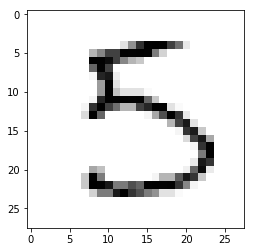

label (extracted by NumPy):      [5]
label (extracted by TensorFlow): [5]


In [1]:
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import tensorflow.examples.tutorials.mnist
import numpy as np

mnist = tensorflow.examples.tutorials.mnist.input_data.read_data_sets(
    "MNIST_data/",
    one_hot = True
)

# access some image (of some index number)
# access the (one-hot) class label of the image
index = 15
image = mnist.test.images[index].reshape(28, 28)
label = mnist.test.labels[index:index + 1]

plt.imshow(
    image,
    cmap          = "Greys",
    interpolation = "nearest"
)
plt.show()

print("label (extracted by NumPy):      {label}".format(
      label = np.where(label[0] == 1)[0]))

sess = tf.InteractiveSession()

print("label (extracted by TensorFlow): {label}".format(
      label = sess.run(tf.argmax(label, 1))))

So, the form of the data is a simple NumPy array that van be represented as an image:

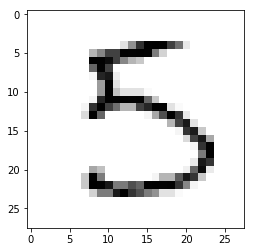

In [4]:
import matplotlib.pyplot as plt
import numpy as np

image_array =\
np.array(
      [[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.20000002,  0.51764709,  0.83921576,
         0.99215692,  0.99607849,  0.99215692,  0.7960785 ,  0.63529414,
         0.16078432,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.40000004,  0.55686277,
         0.7960785 ,  0.7960785 ,  0.99215692,  0.98823535,  0.99215692,
         0.98823535,  0.59215689,  0.27450982,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.99607849,  0.99215692,
         0.95686281,  0.7960785 ,  0.55686277,  0.40000004,  0.32156864,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.67450982,  0.98823535,
         0.7960785 ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.08235294,  0.87450987,
         0.91764712,  0.11764707,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.4784314 ,
         0.99215692,  0.19607845,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.48235297,
         0.99607849,  0.35686275,  0.20000002,  0.20000002,  0.20000002,
         0.03921569,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.08235294,  0.87450987,
         0.99215692,  0.98823535,  0.99215692,  0.98823535,  0.99215692,
         0.67450982,  0.32156864,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.08235294,  0.83921576,  0.99215692,
         0.7960785 ,  0.63529414,  0.40000004,  0.40000004,  0.7960785 ,
         0.87450987,  0.99607849,  0.99215692,  0.20000002,  0.03921569,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.2392157 ,  0.99215692,  0.67058825,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.07843138,  0.43921572,  0.75294125,  0.99215692,  0.83137262,
         0.16078432,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.40000004,  0.7960785 ,
         0.91764712,  0.20000002,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.07843138,
         0.83529419,  0.90980399,  0.32156864,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.24313727,  0.7960785 ,  0.91764712,  0.43921572,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.07843138,  0.83529419,  0.98823535,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.60000002,  0.99215692,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.16078432,  0.91372555,  0.83137262,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.44313729,  0.36078432,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.12156864,  0.67843139,  0.95686281,  0.15686275,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.32156864,  0.99215692,  0.59215689,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.08235294,  0.40000004,  0.40000004,  0.71764708,
         0.91372555,  0.83137262,  0.31764707,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.32156864,  1.        ,  0.99215692,
         0.91764712,  0.59607846,  0.60000002,  0.75686282,  0.67843139,
         0.99215692,  0.99607849,  0.99215692,  0.99607849,  0.83529419,
         0.55686277,  0.07843138,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.27843139,  0.59215689,
         0.59215689,  0.90980399,  0.99215692,  0.83137262,  0.75294125,
         0.59215689,  0.51372552,  0.19607845,  0.19607845,  0.03921569,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ]], dtype = np.float32)

image = image_array.reshape(28, 28)

plt.imshow(
    image,
    cmap          = "Greys",
    interpolation = "nearest"
)
plt.show()

An array can be represented as an image:

[[ 0.5  0.   0. ]
 [ 0.   1.   1. ]
 [ 0.5  0.   0. ]]


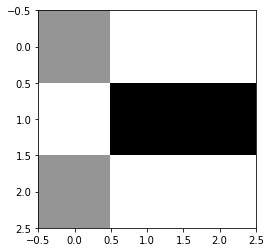

In [6]:
import matplotlib.pyplot as plt
import numpy as np

image_array =\
np.array([
    0.5,
    0.0,
    0.0,
    0.0,
    1.0,
    1.0,
    0.5,
    0.0,
    0.0
])

image = image_array.reshape(3, 3)

print(image)

plt.imshow(
    image,
    cmap          = "Greys",
    interpolation = "nearest"
)
plt.show()

An array can be represented as an image using padding as necessary:

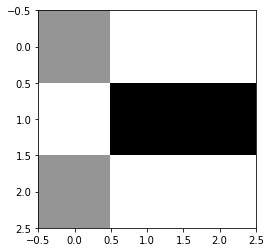

In [10]:
import math
import matplotlib.pyplot as plt
import numpy as np

def numpy_array_pad_square_shape(
    array     = None,
    pad_value = 0
    ):

    width_padded = int(math.ceil(math.sqrt(len(array))))
    padding      = (width_padded ** 2 - len(array)) * [pad_value]
    array        = np.append(array, padding)
    array        = array.reshape(width_padded, width_padded)

    return array

data  = np.array([0.5, 0.0, 0.0, 0.0, 1.0, 1.0, 0.5, 0.0])
image = numpy_array_pad_square_shape(array = data)

plt.imshow(
    image,
    cmap          = "Greys",
    interpolation = "nearest"
)
plt.show()

# example: MNIST

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz

training

epoch: 1	cost: 2.53797165879
epoch: 2	cost: 1.09456407238
epoch: 3	cost: 0.881119381298
epoch: 4	cost: 0.773099724352
epoch: 5	cost: 0.704426293644
epoch: 6	cost: 0.655394366384
epoch: 7	cost: 0.618686331863
epoch: 8	cost: 0.589267465553
epoch: 9	cost: 0.565370515449
epoch: 10	cost: 0.545365656289
epoch: 11	cost: 0.528833894621
epoch: 12	cost: 0.51371610208
epoch: 13	cost: 0.500891014392
epoch: 14	cost: 0.489158772555
epoch: 15	cost: 0.478504846543

testing

accuracy:

0.888100028038

label:
[2]

prediction:
[2]


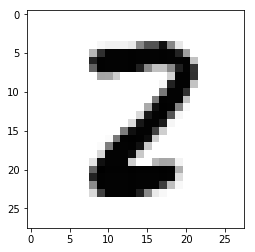

In [47]:
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import tensorflow.examples.tutorials.mnist

mnist = tensorflow.examples.tutorials.mnist.input_data.read_data_sets(
    "MNIST_data/",
    one_hot = True
)

number_of_classes = 10

# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])
# 10 classes (digits 0 to 9)
Y = tf.placeholder(tf.float32, [None, number_of_classes])

W = tf.Variable(tf.random_normal([784, number_of_classes]))
b = tf.Variable(tf.random_normal([number_of_classes]))

# hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)
cost       = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis = 1))
optimizer  = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.arg_max(Y, 1))
accuracy   = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# parameters
training_epochs = 15
batch_size      = 100

with tf.Session() as sess:

    sess.run(tf.global_variables_initializer())

    print("\ntraining\n")

    for epoch in range(training_epochs):

        cost_mean   = 0
        total_batch = int(mnist.train.num_examples / batch_size)

        for i in range(total_batch):

            batch_xs, batch_ys = mnist.train.next_batch(batch_size)

            c, _ = sess.run(
                       [cost, optimizer],
                       feed_dict={X: batch_xs, Y: batch_ys}
                   )
            cost_mean += c / total_batch

        print("epoch: {epoch}\tcost: {cost}".format(
            epoch = epoch + 1,
            cost  = cost_mean
        ))

    print("\ntesting")

    accuracy = accuracy.eval(
                   session   = sess,
                   feed_dict = {
                                   X: mnist.test.images,
                                   Y: mnist.test.labels
                               }
               )

    print("\naccuracy:\n\n{accuracy}".format(
        accuracy = accuracy
    ))

    # select one test example and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("\nlabel:")
    print(sess.run(
              tf.argmax(mnist.test.labels[r:r + 1], 1)
          )
    )
    print("\nprediction:")
    print(sess.run(
              tf.argmax(hypothesis, 1),
              feed_dict = {X: mnist.test.images[r:r + 1]}
          )
    )

    plt.imshow(
        mnist.test.images[r:r + 1].reshape(28, 28),
        cmap          = "Greys",
        interpolation = "nearest"
    )
    plt.show()

# example: simple neural network for XOR truth table

|**A**|**B**|**X**|
|-----|-----|-----|
|0    |0    |0    |
|0    |1    |1    |
|1    |0    |1    |
|1    |1    |0    |

In [57]:
import numpy as np
import tensorflow as tf

x_data = np.array([
                      [0, 0],
                      [0, 1],
                      [1, 0],
                      [1, 1]
                  ],
                  dtype=np.float32
)
y_data = np.array([
                      [0],
                      [1],
                      [1],
                      [0]
                  ],
                  dtype=np.float32
)

X          = tf.placeholder(tf.float32, [None, 2])
Y          = tf.placeholder(tf.float32, [None, 1])

W1         = tf.Variable(tf.random_normal([2, 2]), name = "weight1")
b1         = tf.Variable(tf.random_normal([2]),    name = "bias1")
layer1     = tf.sigmoid(tf.matmul(X, W1) + b1)

W2         = tf.Variable(tf.random_normal([2, 1]), name = "weight2")
b2         = tf.Variable(tf.random_normal([1]),    name = "bias2")
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

cost       = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train      = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

# accuracy computation: true if hypothesis > 0.5 else false
predicted  = tf.cast(hypothesis > 0.5, dtype = tf.float32)
accuracy   = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype = tf.float32))

with tf.Session() as sess:

    sess.run(tf.global_variables_initializer())

    for step in range(10001):

        sess.run(
            train,
            feed_dict = {
                            X: x_data,
                            Y: y_data
                        }
        )
        if step % 2000 == 0:
            print("\nstep: {step}\ncost: {cost}\nW:\n{W}".format(
                step = step,
                cost = sess.run(
                           cost,
                           feed_dict = {
                                           X: x_data,
                                           Y: y_data
                                       }
                       ),
                W    = sess.run([W1, W2])
            ))

    print("\naccuracy report:")
    h, c, a = sess.run(
        [hypothesis, predicted, accuracy],
        feed_dict = {
                        X: x_data,
                        Y: y_data
                    }
    )
    print("\nhypothesis:\n\n{hypothesis}\n\ncorrect (Y):\n\n{correct}\n\naccuracy: {accuracy}".format(
        hypothesis = h,
        correct    = c,
        accuracy   = a
    ))


step: 0
cost: 0.753045797348
W:
[array([[-0.11067381,  0.06392822],
       [-0.0321797 , -0.34502214]], dtype=float32), array([[-0.18104731],
       [-2.40578866]], dtype=float32)]

step: 2000
cost: 0.561914384365
W:
[array([[-0.79464591,  3.22157192],
       [ 0.62589425, -2.91539788]], dtype=float32), array([[-0.78444737],
       [-3.19287276]], dtype=float32)]

step: 4000
cost: 0.142582535744
W:
[array([[-4.08664322,  5.49105358],
       [ 4.42439032, -5.37737322]], dtype=float32), array([[-4.98574877],
       [-5.03301287]], dtype=float32)]

step: 6000
cost: 0.0593350082636
W:
[array([[-5.27438784,  6.26706076],
       [ 5.59442902, -6.11997843]], dtype=float32), array([[-6.67433167],
       [-6.6047492 ]], dtype=float32)]

step: 8000
cost: 0.0363751091063
W:
[array([[-5.80319977,  6.65905046],
       [ 6.11412334, -6.48613453]], dtype=float32), array([[-7.58772278],
       [-7.52101755]], dtype=float32)]

step: 10000
cost: 0.0260161906481
W:
[array([[-6.12727022,  6.9115119 ],
  

# deep learning

Deep learning allows computational models that are composed of multiple processing layers to learn representations of data with multiple levels of abstraction. These methods have dramatically improced the state-of-the-art in speech recognition, visual object recognition, object detection and many other domains such as drug discovery and genomics. Deep learning discovers intricate structure in large data sets by using the backpropagation algorithm to indicate how a machine should change its internal parameters that are used to compute the representation in each layer from the representation in the previous layer. Deep convolutional networks have brought about breakthroughs in processing images, video, speech and sound, whereas recurrent networks have illuminated sequential data such as text and speech.

# example: deep neural network for XOR truth table

In [58]:
import numpy as np
import tensorflow as tf

x_data = np.array([
                      [0, 0],
                      [0, 1],
                      [1, 0],
                      [1, 1]
                  ],
                  dtype = np.float32
)
y_data = np.array([
                      [0],
                      [1],
                      [1],
                      [0]
                  ],
                  dtype = np.float32
)

X          = tf.placeholder(tf.float32, [None, 2])
Y          = tf.placeholder(tf.float32, [None, 1])

W1         = tf.Variable(tf.random_normal([2, 10]), name = "weight1")
b1         = tf.Variable(tf.random_normal([10]),    name = "bias1")
layer1     = tf.sigmoid(tf.matmul(X, W1) + b1)

W2         = tf.Variable(tf.random_normal([10, 10]), name = "weight2")
b2         = tf.Variable(tf.random_normal([10]),     name = "bias2")
layer2     = tf.sigmoid(tf.matmul(layer1, W2) + b2)

W3         = tf.Variable(tf.random_normal([10, 10]), name = "weight3")
b3         = tf.Variable(tf.random_normal([10]),     name = "bias3")
layer3     = tf.sigmoid(tf.matmul(layer2, W3) + b3)

W4         = tf.Variable(tf.random_normal([10, 1]),  name = "weight4")
b4         = tf.Variable(tf.random_normal([1]),      name = "bias4")
hypothesis = tf.sigmoid(tf.matmul(layer3, W4) + b4)

cost       = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train      = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# accuracy computation: true if hypothesis > 0.5 else false
predicted  = tf.cast(hypothesis > 0.5, dtype = tf.float32)
accuracy   = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype = tf.float32))

with tf.Session() as sess:

    sess.run(tf.global_variables_initializer())

    for step in range(10001):

        sess.run(
            train,
            feed_dict = {
                            X: x_data,
                            Y: y_data
                        }
        )
        if step % 2000 == 0:
            print("\nstep: {step}\ncost: {cost}\nW:\n{W}".format(
                step = step,
                cost = sess.run(
                           cost,
                           feed_dict = {
                                           X: x_data,
                                           Y: y_data
                                       }
                       ),
                W    = sess.run([W1, W2])
            ))

    print("\naccuracy report:")
    h, c, a = sess.run(
        [hypothesis, predicted, accuracy],
        feed_dict = {
                        X: x_data,
                        Y: y_data
                    }
    )
    print("\nhypothesis:\n\n{hypothesis}\n\ncorrect (Y):\n\n{correct}\n\naccuracy: {accuracy}".format(
        hypothesis = h,
        correct    = c,
        accuracy   = a
    ))


step: 0
cost: 0.759968400002
W:
[array([[ 1.17050958,  0.23658907,  0.85170525,  1.88875902,  1.69035661,
        -1.20168114,  1.58177483,  0.55276138, -1.39153302, -0.85973883],
       [ 0.4605372 ,  0.36892304,  0.42037812,  0.13853477,  0.47574446,
        -1.01397741, -2.16375875, -0.52245528,  1.84092593, -0.5710631 ]], dtype=float32), array([[ -6.51916325e-01,  -1.85874426e+00,   4.45647389e-02,
         -6.67469561e-01,  -1.54609072e+00,  -9.40441936e-02,
         -1.48086023e+00,  -4.72161453e-03,   1.60759103e+00,
         -1.39276361e+00],
       [ -2.79414564e-01,  -8.82146776e-01,  -1.51190117e-01,
         -2.67493904e-01,  -1.13447070e+00,   8.15222740e-01,
          7.18632489e-02,   3.05037677e-01,   1.10169828e+00,
          9.25161242e-01],
       [  4.75105822e-01,  -9.29442406e-01,   9.13582623e-01,
         -9.78433847e-01,   4.50041622e-01,  -1.35249472e+00,
          4.67909724e-02,  -7.56063581e-01,   9.32560444e-01,
          1.57608414e+00],
       [  4.7475

# simple neural network versus deep neural network

Both the simple and the deep neural networks are successful at modelling the XOR truth table, however, the deep neural network has a far greater accuracy:

|**A**|**B**|**X**|**simple NN**|**deep NN**   |**factor of difference in error**|
|-----|-----|-----|-------------|--------------|---------------------------------|
|0    |0    |0    |0.02304083   |8.59555963e-04|26.8                             |
|0    |1    |1    |0.97056627   |9.99214053e-01|37.5                             |
|1    |0    |1    |0.9699561    |9.99189436e-01|37.1                             |
|1    |1    |0    |0.0201681    |9.79224336e-04|20.6                             |

# TensorBoard

Tensors can be logged and viewed in TensorBoard. Images are simply displayed, histograms are multidimensional tensors and scalar tensors are shown as graphs.

1. Set the tensors to log.

```Python
with tf.variable_scope("layer1") as scope:
    tf.summary.image("input", x_image, 3)
    tf.summary.histogram("layer", L1)
    tf.summary.scalar("loss", cost)
```

2. Merge the summaries.

```Python
summary = tf.summary.merge_all()
```

3. Create a summary writer and add the TensorFlow graph.

```Python
writer = tf.summary.FileWriter(TB_SUMMARY_DIR)
writer.add_graph(sess.graph)
```

4. Run summary merge and add the summary to the writer.

```Python
s, _ = sess.run([summary, optimizer], feed_dict = feed_dict)
writer.add_summary(s, global_step = global_step)
```

5. Launch TensorBoard.

```Bash
tensorboard --logdir=/tmp/mnist_logs
```

# example: TensorBoard

Clear logs and launch TensorBoard:

```Bash
rm -rf /tmp/mnist
tensorboard --logdir=/tmp/mnist
```

In [ ]:
import tensorflow as tf
import tensorflow.examples.tutorials.mnist

# reset everything to rerun in jupyter
tf.reset_default_graph()

# configuration
batch_size      = 100
learning_rate   = 0.5
training_epochs = 500
logs_path       = "/tmp/mnist/1"

# load mnist data set
from tensorflow.examples.tutorials.mnist import input_data
mnist = tensorflow.examples.tutorials.mnist.input_data.read_data_sets(
    "MNIST_data/",
    one_hot = True
)

with tf.name_scope("input"):
    # None => batch size can be any size; 784 => flattened image
    x  = tf.placeholder(tf.float32, shape = [None, 784], name = "x-input") 
    # target 10 output classes
    y_ = tf.placeholder(tf.float32, shape = [None, 10],  name = "y-input")

with tf.name_scope("weights"):
    W = tf.Variable(tf.zeros([784, 10]))

with tf.name_scope("biases"):
    b = tf.Variable(tf.zeros([10]))

with tf.name_scope("softmax"):
    y = tf.nn.softmax(tf.matmul(x, W) + b)

with tf.name_scope("cross-entropy"):
    cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), axis = 1))

# specify optimizer
with tf.name_scope("train"):
    # optimizer is an "operation" which we can execute in a session
    train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

with tf.name_scope("accuracy"):
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    accuracy           = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

tf.summary.scalar("cost", cross_entropy)
tf.summary.scalar("accuracy", accuracy)
tf.summary.scalar("input", x)

summary_operation = tf.summary.merge_all()

with tf.Session() as sess:

    sess.run(tf.global_variables_initializer())

    writer = tf.summary.FileWriter(logs_path)

    # perform training cycles
    for epoch in range(training_epochs):
        
        # number of batches in one epoch
        batch_count = int(mnist.train.num_examples / batch_size)
        
        for i in range(batch_count):
            batch_x, batch_y = mnist.train.next_batch(batch_size)

            _, summary = sess.run(
                [train_op, summary_operation],
                feed_dict = {x: batch_x, y_: batch_y}
            )

            writer.add_summary(summary, epoch * batch_count + i)
            
        if epoch % 100 == 0: 
            print("epoch: {epoch}".format(epoch = epoch))

    print("accuracy: {accuracy}".format(
        accuracy = accuracy.eval(feed_dict = {
                                                 x:  mnist.test.images,
                                                 y_: mnist.test.labels
                                             }
                                )
    ))

# example: softmax classifier for MNIST

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
epoch: 0, cost: 5.5008147295
epoch: 1, cost: 1.82199460918
epoch: 2, cost: 1.2013834101
epoch: 3, cost: 0.94063898856
epoch: 4, cost: 0.794875945937
epoch: 5, cost: 0.700277985768
epoch: 6, cost: 0.633509654484
epoch: 7, cost: 0.583592939865
epoch: 8, cost: 0.543543923416
epoch: 9, cost: 0.512178804576
epoch: 10, cost: 0.486511237662
epoch: 11, cost: 0.464348079616
epoch: 12, cost: 0.445898542932
epoch: 13, cost: 0.430081928332
epoch: 14, cost: 0.416244304167
accuracy: 0.897599995136

label:
[5]

prediction:
[5]


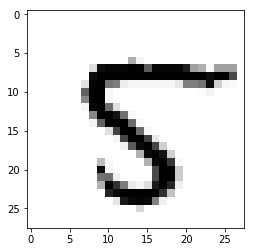

In [7]:
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

# parameters
learning_rate   = 0.001
training_epochs = 15
batch_size      = 100

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# weights and bias for layers
W = tf.Variable(tf.random_normal([784, 10]))
b = tf.Variable(tf.random_normal([10]))

hypothesis = tf.matmul(X, W) + b

# define cost/loss and optimizer
cost      = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = hypothesis, labels = Y))
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(training_epochs):

    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict = feed_dict)
        avg_cost += c / total_batch

    print("epoch: {epoch}, cost: {cost}".format(
        epoch = epoch,
        cost  = avg_cost
    ))

# test accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print("accuracy: {accuracy}".format(
    accuracy = sess.run(
                   accuracy,
                   feed_dict = {
                                   X: mnist.test.images,
                                   Y: mnist.test.labels
                               }
    )
))

# select one test example and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("\nlabel:")
print(sess.run(
          tf.argmax(mnist.test.labels[r:r + 1], 1)
      )
)
print("\nprediction:")
print(sess.run(
          tf.argmax(hypothesis, 1),
          feed_dict = {X: mnist.test.images[r:r + 1]}
      )
)

plt.imshow(
    mnist.test.images[r:r + 1].reshape(28, 28),
    cmap          = "Greys",
    interpolation = "nearest"
)
plt.show()

# rectifier activation functions

A rectifier activation function is defined as

$${
f\left(x\right)=\textrm{max}\left(0,x\right)
}$$

where ${x}$ is the input to the neuron. It has been used in convolutional networks more effectively than the widely-used logistic sigmoid and the hyperbolic tangent. It was the most popular activation function for deep neural networks in 2015. A unit employing the rectifier is also called a rectified linear unit (ReLU).

Rectified linear units, compared to sigmoid function or similar activation functions, allow for faster and effective training of deep neural architectures on large and complex datasets.

A smooth approximation to the rectifier is the following analytic function, called the softplus function:

$${
f\left(x\right)=\ln\left(1+e^{x}\right)
}$$

The derivative of softplus is the logistic function:

$${
f^{\prime}\left(x\right)=\frac{e^{x}}{e^{x}+1}=\frac{1}{1+e^{-x}}
}$$

# example: neural network classifier for MNIST

In [9]:
import random
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

# parameters
learning_rate   = 0.001
training_epochs = 15
batch_size      = 100

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# weights and bias for layers
W1 = tf.Variable(tf.random_normal([784, 256]))
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([256, 256]))
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.Variable(tf.random_normal([256, 10]))
b3 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2, W3) + b3

# define cost/loss and optimizer
cost      = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = hypothesis, labels = Y))
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(training_epochs):

    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict = feed_dict)
        avg_cost += c / total_batch

    print("epoch: {epoch}, cost: {cost}".format(
        epoch = epoch,
        cost  = avg_cost
    ))

# test accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print("accuracy: {accuracy}".format(
    accuracy = sess.run(
                   accuracy,
                   feed_dict = {
                                   X: mnist.test.images,
                                   Y: mnist.test.labels
                               }
    )
))

# select one test example and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("\nlabel:")
print(sess.run(
          tf.argmax(mnist.test.labels[r:r + 1], 1)
      )
)
print("\nprediction:")
print(sess.run(
          tf.argmax(hypothesis, 1),
          feed_dict = {X: mnist.test.images[r:r + 1]}
      )
)

sess.close()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
epoch: 0, cost: 173.803806047
epoch: 1, cost: 44.0933057898
epoch: 2, cost: 27.9979391154
epoch: 3, cost: 19.8257013471
epoch: 4, cost: 14.5126266484
epoch: 5, cost: 10.80432725
epoch: 6, cost: 8.09893777095
epoch: 7, cost: 6.22545443229
epoch: 8, cost: 4.47642658703
epoch: 9, cost: 3.42179229905
epoch: 10, cost: 2.61225969974
epoch: 11, cost: 1.95967011973
epoch: 12, cost: 1.47646401341
epoch: 13, cost: 1.28384371805
epoch: 14, cost: 0.973924499147
accuracy: 0.945699989796

label:
[4]

prediction:
[4]


# Xavier initialization

Xavier initialization in neural networks involves initialization of the weights of a network so that the neuron activation functions are not starting out in saturated or dead regions. In effect, the weights are initialized with pseudorandom numbers that are not "too small" or "too large".

If the input (from the transfer function) for a neuron is very large or very small, the activation function (hyperbolic tangent, for example) is saturated or stuck at +1 or -1 respectively. Having saturated neurons limits their dynamic range and, so, limits their representational power. How can one avoid getting stuck in such saturated regions? The transfer function is a sum of the products of weights and inputs. To avoid the transfer function being too large or too small, the weights and the input can be kept in some sensible range. The input, from data, can be restricted by normalizing the dataset using z-scaling or other methods (ensuring that the data has zero mean and unit variance). What about the weights?

Technically the weights can be set to any pseudorandom values and then can be changed using a learning rile such as stochastic gradient descent to adjust them to minimize error. However, if weights are very large or very small or such that they cause the neuron to be saturated, then it takes gradient descent more iterations to adjust the weights.

Xavier initialization suggests initializing the weights with a variance such that the variance of the transfer function is unity. Ensuring that this variance is unity reduces the likelihood of being stuck in saturated regions of the activation function.

# example: neural network classifier with Xavier initialization for MNIST

In [1]:
import random
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

# parameters
learning_rate   = 0.001
training_epochs = 15
batch_size      = 100

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# weights and bias for layers
W1 = tf.get_variable("W1", shape = [784, 256], initializer = tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.get_variable("W2", shape = [256, 256], initializer = tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.get_variable("W3", shape = [256, 10], initializer = tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2, W3) + b3

# define cost/loss and optimizer
cost      = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = hypothesis, labels = Y))
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(training_epochs):

    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict = feed_dict)
        avg_cost += c / total_batch

    print("epoch: {epoch}, cost: {cost}".format(
        epoch = epoch,
        cost  = avg_cost
    ))

# test accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print("accuracy: {accuracy}".format(
    accuracy = sess.run(
                   accuracy,
                   feed_dict = {
                                   X: mnist.test.images,
                                   Y: mnist.test.labels
                   }
    )
))

# select one test example and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("\nlabel:")
print(sess.run(
          tf.argmax(mnist.test.labels[r:r + 1], 1)
      )
)
print("\nprediction:")
print(sess.run(
          tf.argmax(hypothesis, 1),
          feed_dict = {X: mnist.test.images[r:r + 1]}
      )
)

sess.close()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
epoch: 0, cost: 0.331354504322
epoch: 1, cost: 0.119444444173
epoch: 2, cost: 0.0798904514194
epoch: 3, cost: 0.0552678741227
epoch: 4, cost: 0.0411215884361
epoch: 5, cost: 0.030692967015
epoch: 6, cost: 0.0256018338039
epoch: 7, cost: 0.0202623238294
epoch: 8, cost: 0.0171883650348
epoch: 9, cost: 0.0141780922553
epoch: 10, cost: 0.0123592672347
epoch: 11, cost: 0.011780318041
epoch: 12, cost: 0.0112451218761
epoch: 13, cost: 0.00916771249669
epoch: 14, cost: 0.0129711465011
accuracy: 0.977400004864

label:
[0]

prediction:
[0]


# example: deep neural network classifier with Xavier initialization for MNIST

In [1]:
import random
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

# parameters
learning_rate   = 0.001
training_epochs = 15
batch_size      = 100

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# weights and bias for layers
W1 = tf.get_variable("W1", shape = [784, 512], initializer = tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.get_variable("W2", shape = [512, 512], initializer = tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.get_variable("W3", shape = [512, 512], initializer = tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)

W4 = tf.get_variable("W4", shape = [512, 512], initializer = tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)

W5 = tf.get_variable("W5", shape = [512, 10], initializer = tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L4, W5) + b5

# define cost/loss and optimizer
cost      = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = hypothesis, labels = Y))
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(training_epochs):

    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict = feed_dict)
        avg_cost += c / total_batch

    print("epoch: {epoch}, cost: {cost}".format(
        epoch = epoch,
        cost  = avg_cost
    ))

# test accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print("accuracy: {accuracy}".format(
    accuracy = sess.run(
                   accuracy,
                   feed_dict = {
                                   X: mnist.test.images,
                                   Y: mnist.test.labels
                   }
    )
))

# select one test example and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("\nlabel:")
print(sess.run(
          tf.argmax(mnist.test.labels[r:r + 1], 1)
      )
)
print("\nprediction:")
print(sess.run(
          tf.argmax(hypothesis, 1),
          feed_dict = {X: mnist.test.images[r:r + 1]}
      )
)

sess.close()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
epoch: 0, cost: 0.325931779084
epoch: 1, cost: 0.107867569024
epoch: 2, cost: 0.0705091328517
epoch: 3, cost: 0.0552865000247
epoch: 4, cost: 0.0430004646313
epoch: 5, cost: 0.0329331435739
epoch: 6, cost: 0.030525810439
epoch: 7, cost: 0.0267394819635
epoch: 8, cost: 0.0231419500274
epoch: 9, cost: 0.0197627094166
epoch: 10, cost: 0.0197169608473
epoch: 11, cost: 0.015406726154
epoch: 12, cost: 0.0196975519168
epoch: 13, cost: 0.0184239531601
epoch: 14, cost: 0.0138537911348
accuracy: 0.980000019073

label:
[3]

prediction:
[3]


# example: deep neural network classifier with Xavier initialization and dropout for MNIST

In [1]:
import random
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

# parameters
learning_rate   = 0.001
training_epochs = 15
batch_size      = 100

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# dropout (keep_prob) rate  0.7 on training, but should be 1 for testing
keep_prob = tf.placeholder(tf.float32)

# weights and bias for layers
W1 = tf.get_variable("W1", shape = [784, 512], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)
L1 = tf.nn.dropout(L1, keep_prob = keep_prob)

W2 = tf.get_variable("W2", shape = [512, 512], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
L2 = tf.nn.dropout(L2, keep_prob = keep_prob)

W3 = tf.get_variable("W3", shape = [512, 512], initializer = tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)
L3 = tf.nn.dropout(L3, keep_prob = keep_prob)

W4 = tf.get_variable("W4", shape = [512, 512], initializer = tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob = keep_prob)

W5 = tf.get_variable("W5", shape = [512, 10], initializer = tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L4, W5) + b5

# define cost/loss and optimizer
cost      = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = hypothesis, labels = Y))
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(training_epochs):

    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}
        c, _ = sess.run([cost, optimizer], feed_dict = feed_dict)
        avg_cost += c / total_batch

    print("epoch: {epoch}, cost: {cost}".format(
        epoch = epoch,
        cost  = avg_cost
    ))

# test accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print("accuracy: {accuracy}".format(
    accuracy = sess.run(
                   accuracy,
                   feed_dict = {
                                   X:         mnist.test.images,
                                   Y:         mnist.test.labels,
                                   keep_prob: 1
                   }
    )
))

# select one test example and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("\nlabel:")
print(sess.run(
          tf.argmax(mnist.test.labels[r:r + 1], 1)
      )
)
print("\nprediction:")
print(sess.run(
          tf.argmax(hypothesis, 1),
          feed_dict = {X: mnist.test.images[r:r + 1], keep_prob: 1}
      )
)

sess.close()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
epoch: 0, cost: 0.491187336401
epoch: 1, cost: 0.174933730807
epoch: 2, cost: 0.130297549333
epoch: 3, cost: 0.11029827317
epoch: 4, cost: 0.0910160335949
epoch: 5, cost: 0.0845644689834
epoch: 6, cost: 0.0707050579363
epoch: 7, cost: 0.0713776325307
epoch: 8, cost: 0.0625691854655
epoch: 9, cost: 0.05885692129
epoch: 10, cost: 0.0574975110159
epoch: 11, cost: 0.052429081744
epoch: 12, cost: 0.0469085732659
epoch: 13, cost: 0.0468979393831
epoch: 14, cost: 0.0453263855474
accuracy: 0.982699990273

label:
[4]

prediction:
[4]


# convolutional neural network

A convolutional neural network (CNN, ConvNet) is a type of feed-forward neural network in which the connectivity pattern between its neurons is inspired by the organization of the known animal visual corex. Individual cortical neurons respond to stimuli in a restricted region of space known as teh receptive field. The receptive fields of different neurons overlap partially such that they tile the visual field. The response of an individual neuron to stimuli within its receptive field can be approximated mathematically by a convolution operation. Convolutional networks were inspired by biological processes and are variations of multilayer perceptrons designed to use minimal amounts of preprocessing.

## image recognition

CNNs consist of multiple layers of receptive fields. These are neuron collections which process portions of the input image. The outputs of these collections are then tiled such that their input regions overlap in order to obtain a higher-resolution representation of the original image; this is repeated for every such layer. CNNs may include local or global pooling layers, which combine the outputs of neuron clusters. They also consist of various combinations of convolutional and fully-connected layers, with pointwise nonlinearity applied at the end of or after each layer. A convolutional operation on small regions of input is introduced to reduce the number of free parameters and to improve generalization. One advantage of networks is the use of shared weight in convolution layers, which means that the same filter (weights bank) is used for each pixel in the layer, which reduces memory footprint and improves performance.

## layers

A simple CNN is a sequence of layers, and every layer transforms one volume of activations to another through a differentiable function. There are three main types of layer: convolutional, pooling and fully-connected (exactly as seen in regular neural networks). These are stacked to form a full CNN architecture.

## example architecture for CIFAR-10 classification: INPUT-CONV-RELU-POOL-FC

![](https://raw.githubusercontent.com/wdbm/abstraction/master/media/CNN_1.png)

|**layer**      |**description**                                                                                                                                                                                                                                                                                                 |
|---------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|INPUT [32x32x3]|Hold the raw pixel values of the image, in this case an image of width 32, height 32, and with three color channels RGB.                                                                                                                                                                                        |
|CONV           |Compute the output of neurons that are connected to local regions in the input, each computing a dot product between their weights and a small region they are connected to in the input volume. This may result in a volume such as [32x32x12] when using 12 filters.                                          |
|RELU           |Apply an element-wise activation function, such as ${\textrm{max}\left(0,x\right)}$ thresholding at zero. This leaves the size of the volume unchanged ([32x32x12]).                                                                                                                                            |
|POOL           |Perform a downsampling operation along the spatial dimensions (width, height) resulting in a volume such as [16x16x12].                                                                                                                                                                                         |
|FC             |Compute class scores, resulting in a volume of size [1x1x10], where each of the 10 numbers correspond to a class score, such as the 10 categories of CIFAR-10. As with ordinary neural networks, and as the name implies, each neuron in this layer will be connected to all the numbers in the previous volume.|

In this way, CNNs transform the original image layer by layer from the original pixel values to the final class scores. Some layers contain parameters and others don't. In particular, the CONV and FC layers perform transformations that are a function of not only the activations in the input volume but also of the parameters (the weights and biases of the neurons). Otherwise, teh RELU and POOL layers implement a fixed function. Tha parameters in the CONV and FC layers are trained with gradient descent so that the class scores that the CNN computes are consistent with the labels in the training set for each image.

In summary, a CNN architecture is, in the simplest case, a list of layers that transform the image volume into an output volume (e.g. holding the class scores). There are a few distinct types of layers (e.g. CONV, FC, RELU, POOL are some of the most popular). Each layer accepts an input 3D volume and transforms it to an output 3D volume through a differentiable function. Each layer may or may not have parameters (e.g. CONV and FC do; RELU and POOL don't). Each layer may or may not have additional hyperparameters (e.g. CONV, FC and POOL do; RELU doesn't).

### example representation of CNN architecture

The initial volume stores the raw image pixels and the last colume stores the class scores. Each volume of activations along the processing path is shown as a colume. Since it is difficult to visualize 3D volumes, the slices of each volume are laid out in columns. The last layer volume holds the scores for each class, but here is shown only the sorted top 5 scores with the labels for each one displayed.

# convolutional neural network architectures

## some 2015 design guidelines

Inception networks achieve high performance on a constrained parameter budget, so it is a reasonable place to start.

- [Rethinking the Inception Architecture for Computer Vision](https://arxiv.org/abs/1512.00567)

While increased model size and computational cost tend to translate to immediate quality gains for most tasks as long as enough labelled data is provided for training, computational efficiency and low parameter count are still enabling factors for various use cases such as mobile computers and big-data scenarios. It can be beneficial to explore ways to scale up networks in ways that aim at itilizing the added computation as efficiently as possible by suitable factorized convolutions and aggressive regularization. It can also be the case that gains in classification performance tend to transfer to significant quality gains in a wide variety of application domains.

2015 GoogleNet used 5 million parameters and 2012 AlexNet used 60 million parameters.

Some principles considered by Google are as follows:

- Use stacks of smaller receptive field convolutional layers instead of using a single large receptive field convolutional layer, i.e. 2 stacks of 3x3 conv layers vs a single 7x7 convolutional layer. This approach is motivated by the need to be parameter efficient. It also has the dual effect of more representational capacity as more nonlinearity is introduced with more layers.
- Convolutional layers could be factorizing into deep layers. So, instead of having a single 7x7 convolutional layer, there could be a 1x7 convolutional layer and then a 7x1 convolutional layer. This approach adds more depth and is parameter efficient.
- Balance the depth and width of the network. Use high dimensional representations. This is one of the principles behind Inception modules, which concatenate multiple convolutional layers together. So even for a small spatial size in a convolutional network, Inception modules provide high dimensional representation via multi-scale convolutional concatenation: 1x1, 3x3, 3x3-3x3 and max pool all put together. These Inception modules have a "width" since they can be interpreted as performing multiple operations in parallel. New Inception modules for further by having factorized convolutional sizes: 1x3, 3x1, etc.
- Use 1x1 convolutional layers to reduce dimensionality. Many dimensionality reduction techniques can be used to achieve parameter efficiency. Google believes that this is effective because adjacent feature maps have highly-correlated outputs. This is sensibile for natural images because they are known to exhibit some local statistical properties consistent with this. So, reducing dimensionality via 1x1 NIN (Network in Network) layers does not have a disastrous effect on representational power.

## Network in Network

- [Network in Network](https://arxiv.org/abs/1312.4400)

Network in Network is a deep network structure that enhances model discriminability for local patches in the receptive field. 2014 conventional convolutional layers use linear filters followed by a nonlinear activation function to scan the input. For NIN, micro neural networks with more complex structures (such as a multilayer perceptron) are used to abstract the data within the receptive field. Feature maps are obtained by sliding the micro networks over the input in a manner similar to that in a convolutional neural network and are then fed to the next layer. Deep NIN can be implemented by stacking multiples of the structure.

# toy image

(1, 2, 2, 1)


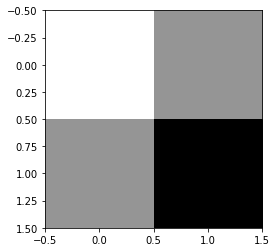

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
sess = tf.InteractiveSession()

image = np.array(
            [[
                [[1], [2]],
                [[2], [3]]
            ]],
            dtype = np.float32
        )

print(image.shape)
plt.imshow(image.reshape(2, 2), cmap = "Greys")
plt.show()

# example: convolutional neural network classifier for MNIST

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
epoch: 0, cost: 0.408241077072
epoch: 1, cost: 0.113866317177
epoch: 2, cost: 0.0791251511245
epoch: 3, cost: 0.0653506306779
epoch: 4, cost: 0.0535522125822
epoch: 5, cost: 0.0458742706338
epoch: 6, cost: 0.0414381767204
epoch: 7, cost: 0.0354744575647
epoch: 8, cost: 0.0327315344029
epoch: 9, cost: 0.0287840995411
epoch: 10, cost: 0.0251736668172
epoch: 11, cost: 0.0224041748257
epoch: 12, cost: 0.020394609374
epoch: 13, cost: 0.0169807871724
epoch: 14, cost: 0.0157285714376
accuracy: 0.988300025463

label:
[2]

prediction:
[2]


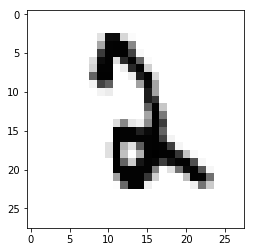

In [1]:
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

# parameters
learning_rate   = 0.001
training_epochs = 15
batch_size      = 100

# input place holders
X     = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1]) # 28x28x1 (black/white)
Y     = tf.placeholder(tf.float32, [None, 10])

# L1 ImgIn shape = (?, 28, 28, 1)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev = 0.01))
# Conv -> (?, 28, 28, 32)
# Pool -> (?, 14, 14, 32)
L1 = tf.nn.conv2d(X_img, W1, strides = [1, 1, 1, 1], padding = "SAME")
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding =  "SAME")
"""
Tensor("Conv2D:0",  shape = (?, 28, 28, 32), dtype = float32)
Tensor("Relu:0",    shape = (?, 28, 28, 32), dtype = float32)
Tensor("MaxPool:0", shape = (?, 14, 14, 32), dtype = float32)
"""

# L2 ImgIn shape=(?, 14, 14, 32)
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev = 0.01))
#    Conv      ->(?, 14, 14, 64)
#    Pool      ->(?, 7, 7, 64)
L2 = tf.nn.conv2d(L1, W2, strides = [1, 1, 1, 1], padding = "SAME")
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = "SAME")
L2 = tf.reshape(L2, [-1, 7 * 7 * 64])
"""
Tensor("Conv2D_1:0",  shape = (?, 14, 14, 64), dtype = float32)
Tensor("Relu_1:0",    shape = (?, 14, 14, 64), dtype = float32)
Tensor("MaxPool_1:0", shape = (?, 7, 7, 64),   dtype = float32)
Tensor("Reshape_1:0", shape = (?, 3136),       dtype = float32)
"""

# final FC 7x7x64 inputs -> 10 outputs
W3 = tf.get_variable("W3", shape=[7 * 7 * 64, 10], initializer = tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2, W3) + b

# define cost/loss and optimizer
cost      = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = hypothesis, labels = Y))
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(training_epochs):

    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict = feed_dict)
        avg_cost += c / total_batch

    print("epoch: {epoch}, cost: {cost}".format(
        epoch = epoch,
        cost  = avg_cost
    ))

# test accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print("accuracy: {accuracy}".format(
    accuracy = sess.run(
                   accuracy,
                   feed_dict = {
                                   X:         mnist.test.images,
                                   Y:         mnist.test.labels
                   }
    )
))

# select one test example and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("\nlabel:")
print(sess.run(
          tf.argmax(mnist.test.labels[r:r + 1], 1)
      )
)
print("\nprediction:")
print(sess.run(
          tf.argmax(hypothesis, 1),
          feed_dict = {X: mnist.test.images[r:r + 1]}
      )
)

sess.close()

plt.imshow(
    mnist.test.images[r:r + 1].
    reshape(28, 28),
    cmap = "Greys",
    interpolation = "nearest"
)
plt.show()

# MNIST comparison using identical learning rate, training epochs and batch size

|**classifier**                                                                 |**accuracy**|
|-------------------------------------------------------------------------------|------------|
|softmax classifier for MNIST                                                   |89.76%      |
|neural network classifier for MNIST                                            |94.57%      |
|neural network classifier with Xavier initialization for MNIST                 |97.74%      |
|deep neural network classifier with Xavier initialization for MNIST            |98%         |
|deep neural network classifier with Xavier initialization and dropout for MNIST|98.26%      |
|convolutional neural network classifier for MNIST                              |98.83%      |

- [dimensionality reduction](https://github.com/wdbm/Psychedelic_Machine_Learning_in_the_Cenozoic_Era/blob/master/dimensionality_reduction.ipynb)

# hyperparameter optimization

## Scikit-Optimize

Scikit-Optimize is a library for minimization of expensive and noisy black-box functions. It implements several methods of sequential model-based optimization.

### example: find a minimum of a noisy function ${f(x)}$ over the range ${-2 < x < 2}$

In [3]:
import numpy as np
import skopt

def f(x):

    return (np.sin(5 * x[0]) * (1 - np.tanh(x[0] ** 2)) * np.random.randn() * 0.1)

result = skopt.gp_minimize(f, [(-2.0, 2.0)])

/usr/local/lib/python3.5/dist-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.5/dist-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.5/dist-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.5/dist-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.5/dist-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.5/dist-packa

          fun: -0.23204481252472509
    func_vals: array([  1.44257961e-02,   7.79354128e-03,  -4.70039946e-03,
        -3.67973598e-03,  -7.06116640e-04,  -3.17876973e-03,
        -1.44235256e-03,   5.39645573e-04,   4.75153843e-04,
         4.75428182e-04,   5.27728488e-05,   2.07094186e-05,
         8.34867503e-06,  -6.00693286e-05,   6.31535665e-05,
         2.30818028e-05,  -1.83723410e-05,   2.52391092e-05,
        -1.34220494e-05,  -9.12747410e-05,  -2.29302043e-05,
        -9.61903722e-02,   4.18629563e-03,  -3.07422229e-06,
         1.66460632e-01,  -5.47278093e-02,  -2.04790248e-05,
         4.01509834e-02,  -3.70783191e-02,   6.15397586e-05,
        -2.32044813e-01,   3.22385062e-05,   8.29354523e-02,
        -1.82539994e-05,   7.53359763e-06,  -1.70819195e-02,
         6.39289743e-05,   5.03488878e-06,  -2.82948447e-05,
         6.85763351e-02,  -3.42105727e-06,  -2.14759167e-05,
        -1.57368452e-05,   2.38449956e-05,   1.86841011e-05,
         6.48748142e-02,   7.54032

In [8]:
result["fun"]

-0.23204481252472509

The object returned is a `scipy.optimize.OptimizeResult`, which is essentially a dictionary subclass.

In [9]:
result.keys()

dict_keys(['x_iters', 'random_state', 'models', 'space', 'func_vals', 'fun', 'x', 'specs'])

Hyperparameter optimization of a machine learning algorithm is often an exchaustive exploration of a subset of the space of all hyperparameter configurations (for example, using a grid search like `sklearn.model_selection.GridSearchCV`), which can be time-consuming. Scikit-Optimize `gp_minimize` can be used to tune hyperparameters using sequential model-based optimization.

### example: minimize the cross-validation mean absolute error objective function of a gradient boosting regression model over the Boston dataset as a function of its hyperparameters

In [10]:
from sklearn.datasets import load_boston
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from skopt import gp_minimize

boston = load_boston()
X, y = boston.data, boston.target
n_features = X.shape[1]

model = GradientBoostingRegressor(
    n_estimators = 50,
    random_state = 0
)

def objective(parameters):

    max_depth, learning_rate, max_features, min_samples_split, min_samples_leaf = parameters

    model.set_params(
        max_depth         = max_depth,
        learning_rate     = learning_rate,
        max_features      = max_features,
        min_samples_split = min_samples_split, 
        min_samples_leaf  = min_samples_leaf
    )

    return -np.mean(
        cross_val_score(
            model,
            X,
            y,
            cv      = 5,
            n_jobs  = -1,
            scoring = "neg_mean_absolute_error"
        )
    )

# bounds of the dimensions of the search space to explore
space = [
    (1, 5),                             # max_depth
    (10 ** -5, 10 ** 0, "log-uniform"), # learning_rate
    (1, n_features),                    # max_features
    (2, 100),                           # min_samples_split
    (1, 100)                            # min_samples_leaf
]

# sequential model-based optimisation
result = gp_minimize(
    objective,
    space,
    n_calls      = 100,
    random_state = 0
)

In [18]:
print(
"""
best score: {best_score}

best parameters:

- max_depth:         {max_depth}
- learning_rate:     {learning_rate}
- max_features:      {max_features}
- min_samples_split: {min_samples_split}
- min_samples_leaf:  {min_samples_leaf}
""".format(
    best_score        = result["fun"],
    max_depth         = result["x"][0],
    learning_rate     = result["x"][1],
    max_features      = result["x"][2],
    min_samples_split = result["x"][3], 
    min_samples_leaf  = result["x"][4]
))


best score: 2.7846223438534983

best parameters:

- max_depth:         4
- learning_rate:     0.164085851332118
- max_features:      7
- min_samples_split: 2
- min_samples_leaf:  1



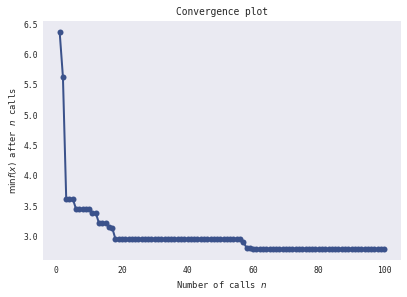

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from skopt.plots import plot_convergence
%matplotlib inline
sns.set(context = "paper", font = "monospace")

plot_convergence(result)